In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('./dataset/dataset.csv')
display(df.head())

df.info()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2023
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2023
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2023
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2023
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2023


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1366 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1366 non-null   float64
 9   year                          1367 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 106.9+ KB


In [3]:
# Drop rows with nulls
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1365 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1365 non-null   object 
 1   region                        1365 non-null   object 
 2   happiness_score               1365 non-null   float64
 3   gdp_per_capita                1365 non-null   float64
 4   social_support                1365 non-null   float64
 5   healthy_life_expectancy       1365 non-null   float64
 6   freedom_to_make_life_choices  1365 non-null   float64
 7   generosity                    1365 non-null   float64
 8   perceptions_of_corruption     1365 non-null   float64
 9   year                          1365 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 117.3+ KB


### 1.1 Checking the Distribution of the data

<Axes: >

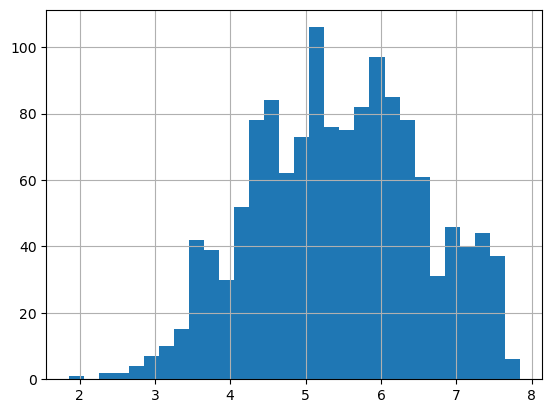

In [4]:
df['happiness_score'].hist(bins=30)

<br><br>

### 1.2 Correlation Analysis

<Axes: >

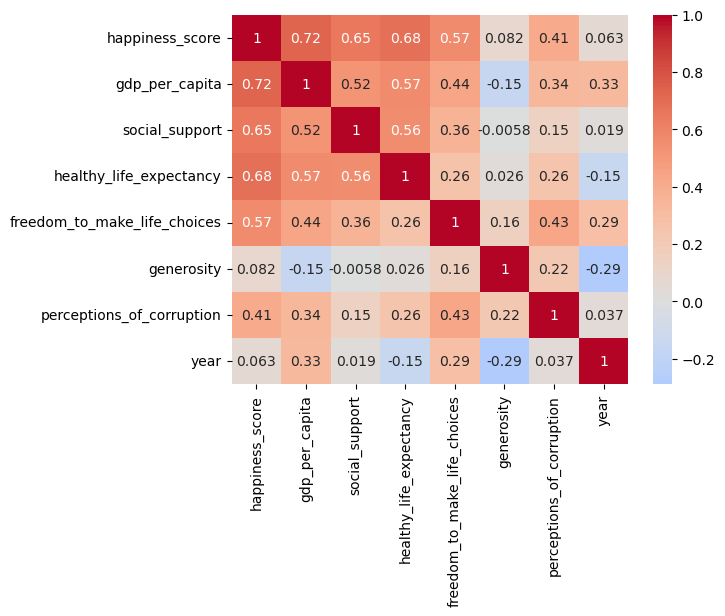

In [5]:
# Correlation heatmap
# Keep only numeric columns for correlation analysis
sns.heatmap(df.select_dtypes("number").corr(),
            annot=True, cmap="coolwarm", center=0)

<br><br>

### 1.3 Pairwise Scatterplots

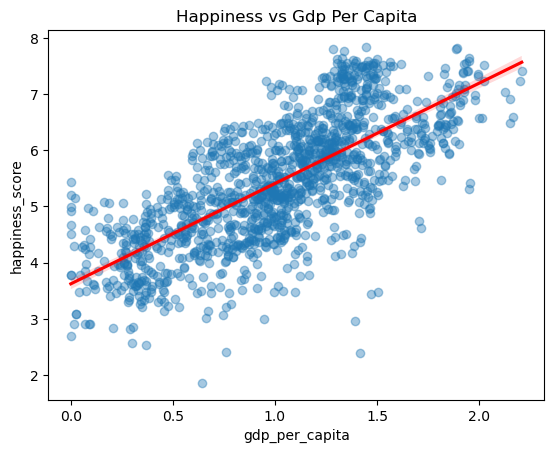

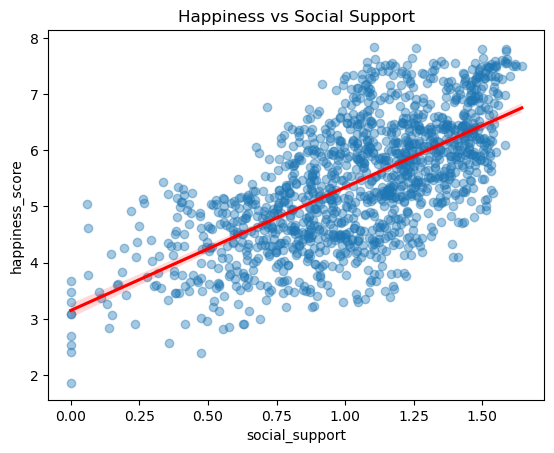

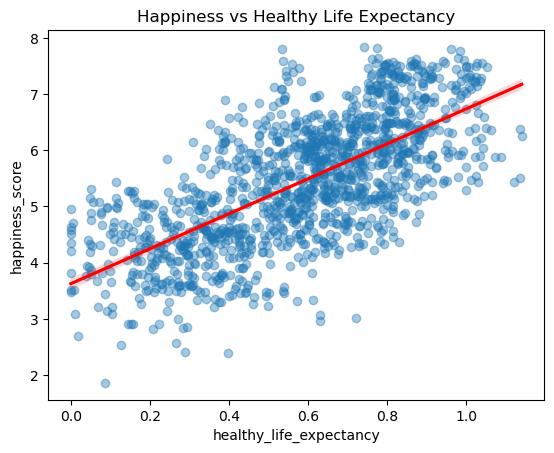

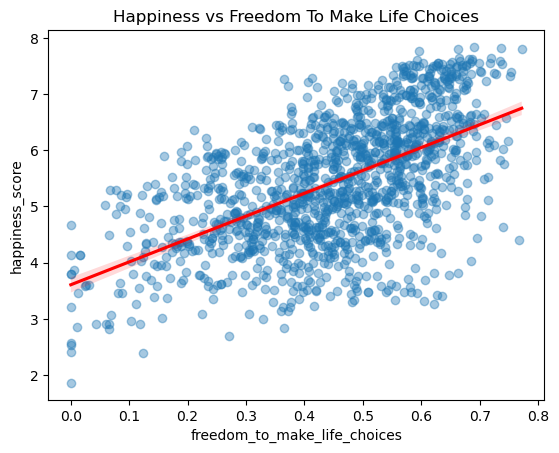

In [6]:
# Scatterplots with regression lines
for feature in ["gdp_per_capita","social_support",
                "healthy_life_expectancy","freedom_to_make_life_choices"]:
    sns.regplot(x=feature, y="happiness_score", data=df,
                scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
    plt.title(f"Happiness vs {feature.replace('_',' ').title()}")
    plt.show()

1. Distribution (Histogram)
    - Most countries cluster between 4 and 7 happiness score.
    - Very few extremely low (<3) or extremely high (>7.5) scores.

2. Correlation Heatmap
    - Strongest drivers:
        - GDP per capita (0.72)
        - Healthy life expectancy (0.68)
        - Social support (0.65)
    - Medium driver:
        - Freedom to make life choices (0.57)
    - Weak drivers:
        - Perceptions of corruption (0.42)
        - Generosity (0.08, almost no correlation)
    - Year has weak correlation (0.06), meaning happiness didn’t strongly trend up/down globally overall.

3. Scatterplots with Regression Lines
    - GDP, Social Support, Life Expectancy, Freedom → clear positive slopes.
    - Generosity & corruption (not shown here) → weaker/noisy trends.

<br><br>

### 1.4 Time Trends


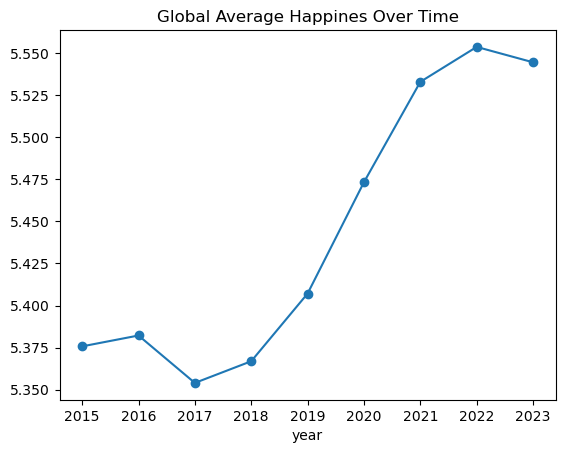

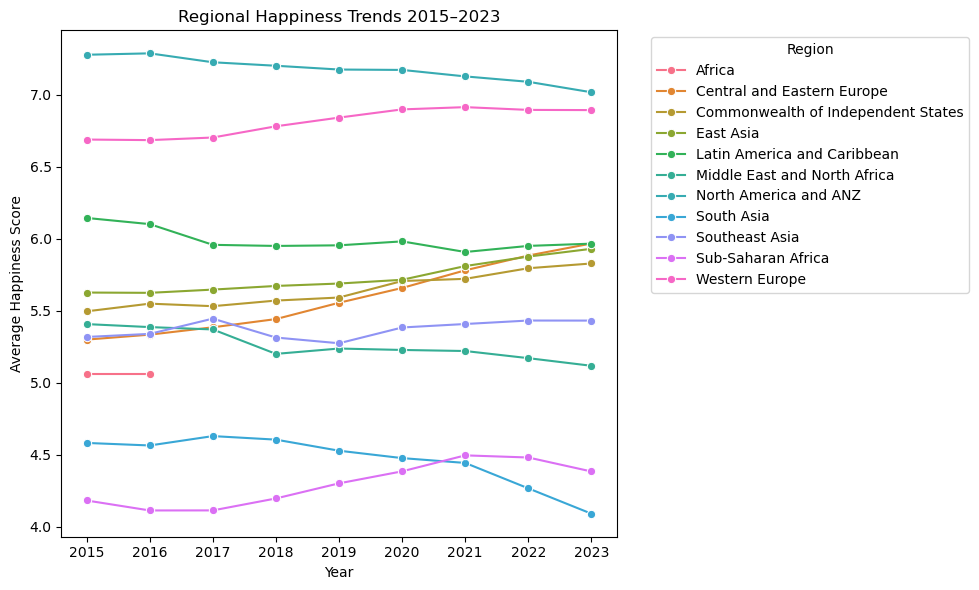

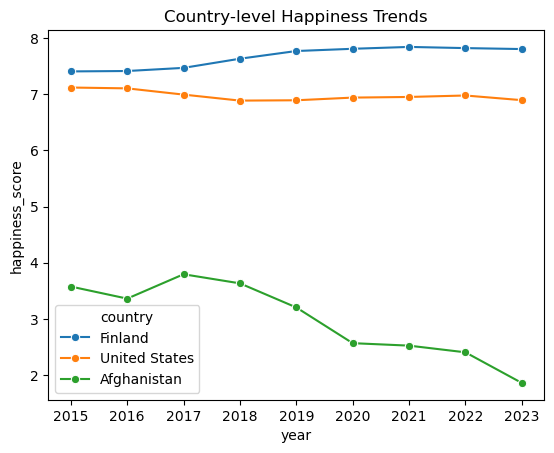

In [7]:
# Glboal trend
global_trend = df.groupby('year')["happiness_score"].mean()
global_trend.plot(marker='o', title="Global Average Happines Over Time")


# Regional trends
region_trends = df.groupby(["year","region"])["happiness_score"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x="year", y="happiness_score", hue="region", data=region_trends, marker="o")

plt.title("Regional Happiness Trends 2015–2023")
plt.xlabel("Year")
plt.ylabel("Average Happiness Score")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Example country trends
country_trends = df[df['country'].isin(["Finland", "United States", "Afghanistan"])]
sns.lineplot(x="year", y="happiness_score", hue="country", data=country_trends, marker='o')
plt.title("Country-level Happiness Trends")
plt.show()
                                        

1. Global Average (2015–2023)
    - Pretty stable overall: ~5.35 → ~5.55.
    - Small dip in 2017, strong recovery after 2019, peaking in 2022.

2. Regional Trends (from before, once legend fixed)
    - Western Europe & North America/ANZ consistently top.
    - Sub-Saharan Africa & South Asia consistently lowest.
    - Some mid-tier regions (Latin America, Eastern Europe) show mild fluctuations.

3. Country Trends
    - Finland steadily rising → consistently #1 since ~2018.
    - United States flat/slight decline → hovering ~7.0.
    - Afghanistan sharp decline post-2017 → now the lowest globally.

<br><br>

### 1.5 Ranking

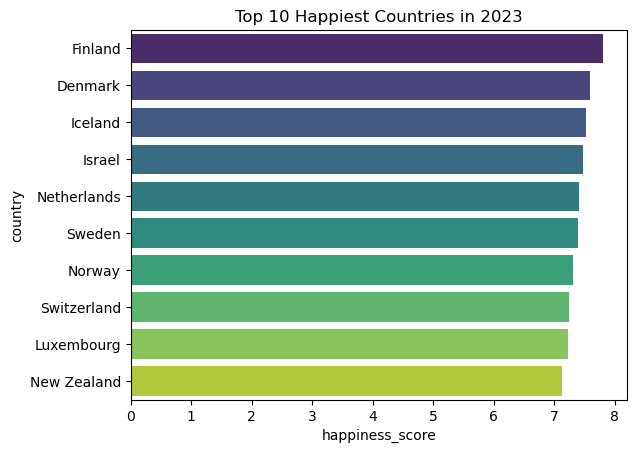

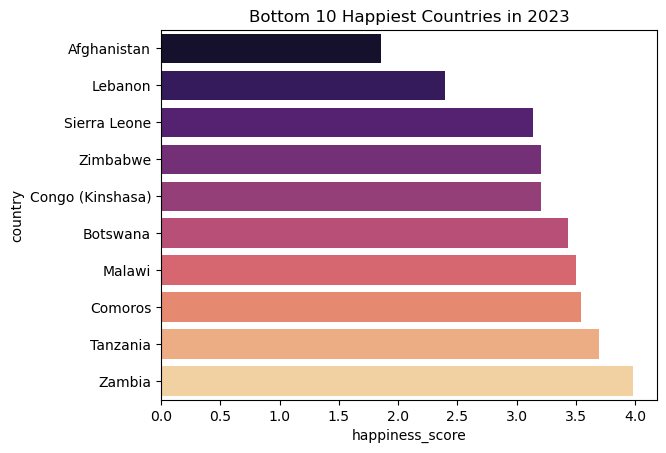

In [8]:
# Top 10 happiest countries lastest year
latest_year = df['year'].max()
top10 =df[df['year']==latest_year].nlargest(10, 'happiness_score')

sns.barplot(x="happiness_score", y="country", data=top10, hue="country", dodge=False, legend=False, palette="viridis")
plt.title(f"Top 10 Happiest Countries in {latest_year}")
plt.show()

# Bottom 10 happiest countries lastest year
bottom10 =df[df['year']==latest_year].nsmallest(10, 'happiness_score')

sns.barplot(x="happiness_score", y="country", data=bottom10, hue="country", dodge=False, legend=False, palette="magma")
plt.title(f"Bottom 10 Happiest Countries in {latest_year}")
plt.show()



### Top 10 Happiess Countries for 2023:
- Finland is clearly the topest(score ~7.5)
- Denmark and Iceland are following it (score ~7.3 and ~7.4)

### Bottom 10 Happiess Countries for 2023:
- Afghanistan is clearly the lowest (score ~1.9).
- Several Sub-Saharan African countries dominate the bottom of the list.
- Lebanon also shows up very low, reflecting its recent crises.<br><br>

<br><br>

## Exploratory Data Analysis (EDA) Summary

### 1. Distribution of Happiness Scores
- Happiness scores (2015–2023) range between **~2 and ~8**.
- The majority of countries fall between **4 and 7**.
- Very few countries achieve extremely low or extremely high scores.


### 2. Correlation Insights
- **GDP per capita (0.72)**, **social support (0.65)**, and **healthy life expectancy (0.68)** show the strongest positive correlation with happiness.
- **Freedom to make life choices (0.57)** also has a significant positive correlation.
- **Generosity (0.08)** has a weak correlation with happiness.
- **Perceptions of corruption (0.41)** shows moderate correlation.
- Year itself has very low correlation, meaning global scores are fairly stable.



### 3. Key Relationships
- **Happiness increases** with higher GDP, stronger social support, longer healthy life expectancy, and greater freedom of choice.
- Scatter plots confirm clear **positive linear trends** for these key features.



### 4. Regional Analysis
- **Western Europe, North America, and ANZ** report the **highest average happiness**.
- **Sub-Saharan Africa and South Asia** consistently have **lower scores**.
- Regional happiness is relatively stable over time, with **Western Europe leading**.


### 5. Country-Level Trends
- **Finland** remains the happiest country with consistently high scores since 2015.
- **United States** shows stable but slightly lower scores (~6.8–7.1).
- **Afghanistan** ranks the lowest, with a sharp decline after 2018.



### 6. Top & Bottom Countries in 2023
- **Top 10 Happiest Countries:** Finland, Denmark, Iceland, Israel, Netherlands, Sweden, Norway, Switzerland, Luxembourg, New Zealand.
- **Bottom 10 Happiest Countries:** Afghanistan, Lebanon, Sierra Leone, Zimbabwe, Congo (Kinshasa), Botswana, Malawi, Comoros, Tanzania, Zambia.



### 7. Global Happiness Trend
- Global average happiness is **stable around 5.3–5.5**.
- A slight increase is visible after 2018, peaking around 2022.



## Key Takeaways
- Economic prosperity (**GDP per capita**) and social well-being (**support, health, freedom**) are the most critical drivers of happiness.
- Regions differ significantly, highlighting inequalities.
- Despite yearly variations, **global happiness levels remain stable**.


***

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## Preparing Data for Modeling

Separating the Categorical and Numeric data

In [10]:
df_cat = df[['country','region']]
df_num = df.drop(['country','region'], axis=1)

Using OneHotEncoder to encode the categorical data

In [11]:
ohe = OneHotEncoder(drop='first') #initializing encoder
ohe.fit(df_cat)
df_cat_new = ohe.transform(df_cat).toarray()
df_cat_new

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

I actually do not want an array at this time. Instead I will use get_dummies

In [12]:
df_cat_dummy = pd.get_dummies(df_cat, drop_first='True')
df_cat_dummy

,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,...,region_Central and Eastern Europe,region_Commonwealth of Independent States,region_East Asia,region_Latin America and Caribbean,region_Middle East and North Africa,region_North America and ANZ,region_South Asia,region_Southeast Asia,region_Sub-Saharan Africa,region_Western Europe
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1364,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [13]:
#combining encoded category df with numeric df
new_df = pd.concat([df_cat_dummy, df_num], axis=1)
new_df

,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,...,region_Sub-Saharan Africa,region_Western Europe,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,False,False,False,False,False,False,False,False,False,False,...,False,True,7.804,1.88800,1.58500,0.53500,0.77200,0.12600,0.53500,2023
1,False,False,False,False,False,False,False,False,False,False,...,False,True,7.586,1.94900,1.54800,0.53700,0.73400,0.20800,0.52500,2023
2,False,False,False,False,False,False,False,False,False,False,...,False,True,7.530,1.92600,1.62000,0.55900,0.73800,0.25000,0.18700,2023
3,False,False,False,False,False,False,False,False,False,False,...,False,False,7.473,1.83300,1.52100,0.57700,0.56900,0.12400,0.15800,2023
4,False,False,False,False,False,False,False,False,False,False,...,False,True,7.403,1.94200,1.48800,0.54500,0.67200,0.25100,0.39400,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,False,False,False,False,False,False,False,False,False,False,...,True,False,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191,2015
1363,False,False,False,False,False,False,False,False,False,False,...,True,False,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,2015
1364,False,False,False,False,False,False,False,False,False,False,...,False,False,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906,2015
1365,False,False,False,False,False,False,False,False,False,False,...,True,False,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062,2015


## Features, Target, Training Set, Validation Set, and Test Set

In [14]:
features = new_df.drop('happiness_score', axis=1)
target = new_df['happiness_score']

#goal is to make a 60:20:20 split
features_intermediate, features_test, target_intermediate, target_test = train_test_split(features, target, test_size=0.20) #20% test set

features_train, features_valid, target_train, target_valid = train_test_split(features_intermediate, target_intermediate, test_size=0.25) # 25% of 80 = 20

### Decision Tree Model

In [34]:
#establishing values for comparison
best_rmse = 10000
best_r2 = 10000
best_mae = 10000
best_depth = 0

In [35]:
for depth in range(1,7): #established desired range
    model_dt = DecisionTreeRegressor(random_state=616, max_depth=depth)
    model_dt.fit(features_train, target_train)
    predictions_valid_dt = model_dt.predict(features_valid)
    rmse = mean_squared_error(target_valid, predictions_valid_dt)**0.5
    if rmse < best_rmse:
        best_rmse = rmse
        best_depth = depth
f"Best RMSE Value: {best_rmse}, Best Depth: {best_depth}"

'Best RMSE Value: 0.5354817817970936, Best Depth: 6'

In [17]:
for depth in range(1,7):
    model_dt = DecisionTreeRegressor(random_state=616, max_depth=depth)
    model_dt.fit(features_train, target_train)
    predictions_valid_dt = model_dt.predict(features_valid)
    r2 = r2_score(target_valid, predictions_valid_dt)
    if r2 < best_r2:
        best_r2 = r2
        best_depth = depth
f"Best R2 Value: {best_r2}, Best Depth: {best_depth}"

'Best R2 Value: 0.42346101087706467, Best Depth: 1'

In [18]:
for depth in range(1,7):
    model_dt = DecisionTreeRegressor(random_state=616, max_depth=depth)
    model_dt.fit(features_train, target_train)
    predictions_valid_dt = model_dt.predict(features_valid)
    mae = mean_absolute_error(target_valid, predictions_valid_dt)
    if mae < best_mae:
        best_mae = mae
        best_depth = depth
f"Best MAE Value: {best_mae}, Best Depth: {best_depth}"

'Best MAE Value: 0.4048640482551492, Best Depth: 6'

__With the dataset as is, this model seems to be attaining low to mid metric values.__

__Will proceed with Random Forest__

## Random Forest Model

In [36]:
#values for comparison
best_rmse = 10000
best_r2 = 10000
best_mae = 10000
best_depth = 0
best_est = 0

In [20]:
for est in range(10, 51, 10):
    for depth in range(1,11):
        model_rf = RandomForestRegressor(random_state=616, n_estimators=est, max_depth=depth)
        model_rf.fit(features_train, target_train)
        predictions_valid_rf = model_rf.predict(features_valid)
        rmse = mean_squared_error(target_valid, predictions_valid_rf)**0.5
        if rmse < best_rmse:
            best_rmse = rmse
            best_est = est
            best_depth = depth
f"Best RMSE: {best_rmse}, Best Number of Estimators: {best_est}, Best Depth: {best_depth}"

'Best RMSE: 0.40438390912812633, Best Number of Estimators: 30, Best Depth: 10'

In [21]:
for est in range(10, 51, 10):
    for depth in range(1,11):
        model_rf = RandomForestRegressor(random_state=616, n_estimators=est, max_depth=depth)
        model_rf.fit(features_train, target_train)
        predictions_valid_rf = model_rf.predict(features_valid)
        r2 = r2_score(target_valid, predictions_valid_rf)**0.5
        if r2 < best_r2:
            best_r2 = r2
            best_est = est
            best_depth = depth
f"Best R2 Score: {best_r2}, Best Number of Estimators: {best_est}, Best Depth: {best_depth}"

'Best R2 Score: 0.6870763260099999, Best Number of Estimators: 10, Best Depth: 1'

In [22]:
for est in range(10, 51, 10):
    for depth in range(1,11):
        model_rf = RandomForestRegressor(random_state=616, n_estimators=est, max_depth=depth)
        model_rf.fit(features_train, target_train)
        predictions_valid_rf = model_rf.predict(features_valid)
        mae = mean_absolute_error(target_valid, predictions_valid_rf)**0.5
        if mae < best_mae:
            best_mae = mae
            best_est = est
            best_depth = depth
f"Best RMSE: {best_mae}, Best Number of Estimators: {best_est}, Best Depth: {best_depth}"

'Best RMSE: 0.5643365186136123, Best Number of Estimators: 30, Best Depth: 10'

__Mostly low Metric Values again. Except the R2 score is not the worst. A 0.687 is getting closer to a desired value.__

## Linear Regression Model

In [23]:
model_lr = LinearRegression()
model_lr.fit(features_train, target_train)
predictions_valid_lr = model_lr.predict(features_valid)

rmse_lr = mean_squared_error(target_valid, predictions_valid_lr)**0.5
r2_lr = r2_score(target_valid, predictions_valid_lr)
mae_lr = mean_absolute_error(target_valid, predictions_valid_lr)

print(f"RMSE: {rmse_lr}")
print(f"R2 Score: {r2_lr}")
print(f"MAE: {mae_lr}")

RMSE: 626547138.2924987
R2 Score: -2.925217016191e+17
MAE: 41895473.1608265


<span style='color:red'> __Oh gosh, we won't be using that again__ </span>

## Ridge Model

Never attempted this model before. But I came across it in the sklearn documentation.

In [30]:
model_r = Ridge(random_state=616) #initializing model
model_r.fit(features_train, target_train) #fitting
predictions_valid_r = model_r.predict(features_valid) #predicting
r2_r = r2_score(target_valid, predictions_valid_r) #r2 score
r2_r

0.9106005921356111

<span style='color:green'> __This score of about 0.91 is ASTRONOMICAL! Let's check how the other metrics do.__ </span>

In [31]:
rmse_r = mean_squared_error(target_valid, predictions_valid_r)**0.5
rmse_r

0.34637140105310765

In [32]:
mae_r = mean_absolute_error(target_valid, predictions_valid_r)
mae_r

0.2581520615110822

To my suprise these metrics did not perform as well. The documentation uses the R2 score as it's base score calculation so it must work best with it.

### Testing Ridge on test set

In [37]:
predictions_test_r = model_r.predict(features_test)
r2_test_r = r2_score(target_test, predictions_test_r)
f"R2 Score for Ridge Model: {r2_test_r}"

'R2 Score for Ridge Model: 0.8946786098847713'

<span style='color:green'> __OK! Not too bad! About 0.895!__ </span>